In [52]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
personas_data = pickle.load(open("Data/final.pickle", "rb")) # SHOULD BE IN FOLDER PICKLE SO TO MODIFY!

In [3]:
display(personas_data)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN,"[make, regarding, regarding]",[new],"[Mackenzie, husband, decision, make, niece]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# we drop the characters that have no words associated to them -  they do not appear in summaries
personas_noNA = personas_data.dropna(subset="Chunks")
display(personas_noNA)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,..."
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),..."
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336450,336451,NaN,NaN,NaN,jeffrey sieverding,NaN,tt9913288,Mail Man,M,NaN,Letters,2020.0,NaN,[stands],"[ordinary, normal]","[Charlie, Porter, leads, life, home, get, bill...","[[(Charlie, NNP)], [(Porter, NNP)], (ordinary,..."
336452,336453,NaN,NaN,NaN,tenley kellogg,NaN,tt9914522,Jade,F,NaN,The Holden Family Plan,2019.0,NaN,[make],[new],"[honeymoon, Mackenzie, Evan, decision, make, r...","[(honeymoon, NN), [(Mackenzie, NNP)], (new, JJ..."
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),..."
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),..."


In [5]:
# Check the type of the first element in each column to make sure they were saved properly
first_verb = type(personas_noNA['Verbs'][0])
first_noun = type(personas_noNA['Nouns'][0])
first_adjective = type(personas_noNA['Adjectives'][0])

print(f'Type of the first element in Verbs column: {first_verb}')
print(f'Type of the first element in Nouns column: {first_noun}')
print(f'Type of the first element in Adjectives column: {first_adjective}')

Type of the first element in Verbs column: <class 'list'>
Type of the first element in Nouns column: <class 'list'>
Type of the first element in Adjectives column: <class 'list'>


In [8]:
# create a column "decade" to do the analysis on decades and not years
final_personas_df = personas_noNA.copy()
final_personas_df['decade'] = final_personas_df['release_date'] // 10 * 10
display(final_personas_df)

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age,Verbs,Adjectives,Nouns,Chunks,decade
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent...",2000.0
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0,"[terraformed, allowing, become, authority, sen...","[matriarchal, police, second, second, small, s...","[film, depicts, Mars, positions, story, concer...","[(film, NN), (depicts, NNS), (Mars, NNP), (84,...",2000.0
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0,"[wearing, become, named, named, held, mining, ...","[transport, remote, ancient, horrific, team, d...","[pressure, suits, society, prisoner, Williams,...","[(wearing, VBG), (pressure, NN), (suits, NNS),...",2000.0
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans...",2000.0
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ...",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336450,336451,NaN,NaN,NaN,jeffrey sieverding,NaN,tt9913288,Mail Man,M,NaN,Letters,2020.0,NaN,[stands],"[ordinary, normal]","[Charlie, Porter, leads, life, home, get, bill...","[[(Charlie, NNP)], [(Porter, NNP)], (ordinary,...",2020.0
336452,336453,NaN,NaN,NaN,tenley kellogg,NaN,tt9914522,Jade,F,NaN,The Holden Family Plan,2019.0,NaN,[make],[new],"[honeymoon, Mackenzie, Evan, decision, make, r...","[(honeymoon, NN), [(Mackenzie, NNP)], (new, JJ...",2010.0
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0,"[make, regarding]",[new],"[Mackenzie, husband, decision]","[[(Mackenzie, NNP)], (new, JJ), (husband, NN),...",2010.0
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0,"[murdered, regarding, make, regarding]","[new, niece]","[Holden, sister, brother, law, husband, Evan, ...","[[(Holden, NNP)], (sister, NN), (brother, NN),...",2010.0


In [13]:
# sort the rows to have decades in ascending orders
final_personas_df = final_personas_df.sort_values(by='decade')

In [15]:
unique_decades = final_personas_df['decade'].unique() # control the order of the decades
print(unique_decades)

[1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020.]


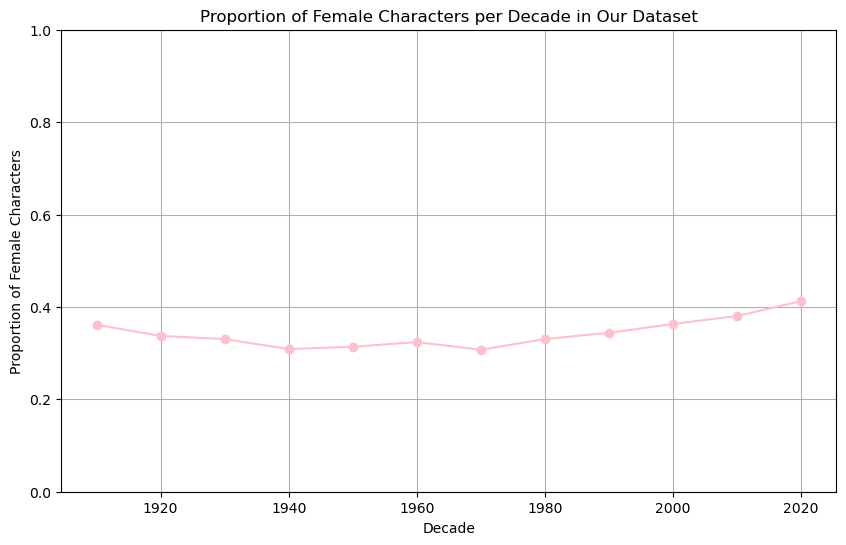

In [25]:
# group the movies by year
#characters_data['release_date'] = pd.to_datetime(characters_data['release_date'])
personas_by_decade = final_personas_df.groupby(final_personas_df['decade'])

# Calculate the proportion of men and women per year
proportion_female = personas_by_decade['actor_gender'].apply(lambda x: (x == 'F').sum() / len(x))
proportion_male = 1 - proportion_female

plt.figure(figsize=(10, 6))
proportion_female.plot(kind='line', color='pink', marker='o')
plt.title('Proportion of Female Characters per Decade in Our Dataset')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Characters')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()

In [42]:
def create_gender_dictionaries(df):
    # Initialize dictionaries for male and female characters
    male_dict = {}
    female_dict = {}

    # Iterate through the dataframe and populate dictionaries
    for index, row in df.iterrows():
        gender = row['actor_gender']
        decade = row['decade'] # we want the create a ductionnary per decade to later analyze

        # Check if the gender is male and handle empty lists (characters don't necessarily have words of the 3 cat. associated to them
        if gender == 'M':
            if decade not in male_dict:
                male_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []} # create a dict per decade

            male_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            male_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            male_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

        # Check if the gender is female and handle empty lists
        elif gender == 'F':
            if decade not in female_dict:
                female_dict[decade] = {'Verbs': [], 'Adjectives': [], 'Nouns': []}

            female_dict[decade]['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            female_dict[decade]['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            female_dict[decade]['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

    return male_dict, female_dict


In [43]:
male_dict, female_dict = create_gender_dictionaries(final_personas_df)

In [44]:
#test function to check the dictionnaries per decade
def print_gender_dictionaries(male_dict, female_dict):
    # Print the first few elements of each decade in the male dictionary
    print("Male Dictionary:")
    for decade, values in male_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

    # Print the first few elements of each decade in the female dictionary
    print("Female Dictionary:")
    for decade, values in female_dict.items():
        print(f"Decade: {decade}")
        print(f"Verbs: {values['Verbs'][:5]}")
        print(f"Adjectives: {values['Adjectives'][:5]}")
        print(f"Nouns: {values['Nouns'][:5]}")
        print()

# Assuming df is your DataFrame
print_gender_dictionaries(male_dict, female_dict)

Male Dictionary:
Decade: 1910.0
Verbs: ['fellow', 'examining', 'examining', 'pawnshop', 'dusting']
Adjectives: ['burglar', 'dependable', 'assistant', 'pawnshop', 'fabulous']
Nouns: ['competes', 'shop', 'capture', 'destroys', 'clock']

Decade: 1920.0
Verbs: ['approaches', 'causing', 'become', 'appointed', 'arrives']
Adjectives: ['insane', 'last', 'testament', 'last', 'second']
Nouns: ['River', 'millionaire', 'Cyrus', 'death', 'greedy']

Decade: 1930.0
Verbs: ['arrives', 'arrives', 'arrives', 'gang', 'arrives']
Adjectives: ['young', 'young', 'young', 'valley', 'grown']
Nouns: ['revenge', 'outlaw', 'steals', 'Carruthers', 'outlaw']

Decade: 1940.0
Verbs: ['turns', 'agrees', 'takes', 'considers', 'reviving']
Adjectives: ['weak', 'come', 'hypnotic', 'assistant', 'awaken']
Nouns: ['area', 'Count', 'enters', 'house', 'greets']

Decade: 1950.0
Verbs: ['skipper', 'skipper', 'fishing', 'skipper', 'fishing']
Adjectives: ['Margaret', 'dead', 'crew', 'ship', 'prove']
Nouns: ['II', 'Battle', 'Atlant

In [45]:
def calculate_word_frequencies(dictionary):
    # Initialize a dictionary for each category (Verbs, Adjectives, Nouns)
    frequencies = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

    # Iterate through the dictionary and calculate word frequencies
    for category, words in dictionary.items():
        total_words = len(words)
        word_counter = Counter(words)
        frequencies[category] = {word: count / total_words for word, count in word_counter.items()}

    return frequencies

In [46]:
male_frequencies_per_decade = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in male_dict.items()}
female_frequencies_per_decade = {decade: calculate_word_frequencies(dictionary) for decade, dictionary in female_dict.items()}

In [49]:
def print_word_frequencies(frequencies):
    # Print the first few words along with their frequencies for each category
    for category, word_freqs in frequencies.items():
        print(f"{category} Frequencies:")
        for word, freq_dict in word_freqs.items():
            for subword, subfreq in freq_dict.items():
                print(f"{word} - {subword}: {subfreq:.4f}")
        print()

In [51]:
#print_word_frequencies(male_frequencies_per_decade)
#print_word_frequencies(female_frequencies_per_decade)

In [83]:
def plot_top_words_per_decade(frequencies_per_decade, category, gender, top_n=10):
    # Iterate through each decade and plot the top words
    for decade, frequencies in frequencies_per_decade.items():
        words = list(frequencies[category].keys())
        values = list(frequencies[category].values())

        # Get the top N words and their frequencies
        top_words = [word for _, word in sorted(zip(values, words), reverse=True)[:top_n]]
        top_frequencies = [frequencies[category][word] for word in top_words]

        # Plot the bar chart for each decade
        plt.figure(figsize=(10, 6))
        plt.bar(top_words, top_frequencies, color='skyblue')
        plt.title(f'Top {top_n} {category} Words for {gender} Characters - Decade {decade}')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.show()

In [69]:
def plot_top_words_per_decade(male_frequencies_per_decade, female_frequencies_per_decade, categories, top_n=10):
    # Create subplots for each category
    decades = male_frequencies_per_decade.keys()
    num_categories = len(categories)

    fig, axs = plt.subplots(len(decades), num_categories * 2, figsize=(5 * num_categories, 3 * len(decades)))

    # Iterate through each decade
    for i, decade in enumerate(decades):
        for j, category in enumerate(categories):
            male_frequencies = male_frequencies_per_decade[decade][category]
            female_frequencies = female_frequencies_per_decade[decade][category]

            # Get the top N words and their frequencies for both genders
            top_male_words = [word for _, word in sorted(zip(male_frequencies.values(), male_frequencies.keys()), reverse=True)[:top_n]]
            top_male_frequencies = [male_frequencies[word] for word in top_male_words]

            top_female_words = [word for _, word in sorted(zip(female_frequencies.values(), female_frequencies.keys()), reverse=True)[:top_n]]
            top_female_frequencies = [female_frequencies[word] for word in top_female_words]

            # Plot the bar chart for male characters
            bars_male = axs[i, j * 2].bar(top_male_words, top_male_frequencies, color='blue')
            axs[i, j * 2].set_title(f'Male - {category} {decade}')
            #axs[i, j * 2].set_xlabel('Words')
            axs[i, j * 2].set_ylabel('Frequency')

            # Plot the bar chart for female characters
            bars_female = axs[i, j * 2 + 1].bar(top_female_words, top_female_frequencies, color='pink')
            axs[i, j * 2 + 1].set_title(f'Female - {category} {decade}')
            #axs[i, j * 2 + 1].set_xlabel('Words')
            axs[i, j * 2 + 1].set_ylabel('Frequency')

            # Rotate x-axis tick labels
            axs[i, j * 2].set_xticklabels(top_male_words, rotation=45, ha='right')
            axs[i, j * 2 + 1].set_xticklabels(top_female_words, rotation=45, ha='right')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_25253/2326629281.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j * 2].set_xticklabels(top_male_words, rotation=45, ha='right')
/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_25253/2326629281.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j * 2 + 1].set_xticklabels(top_female_words, rotation=45, ha='right')


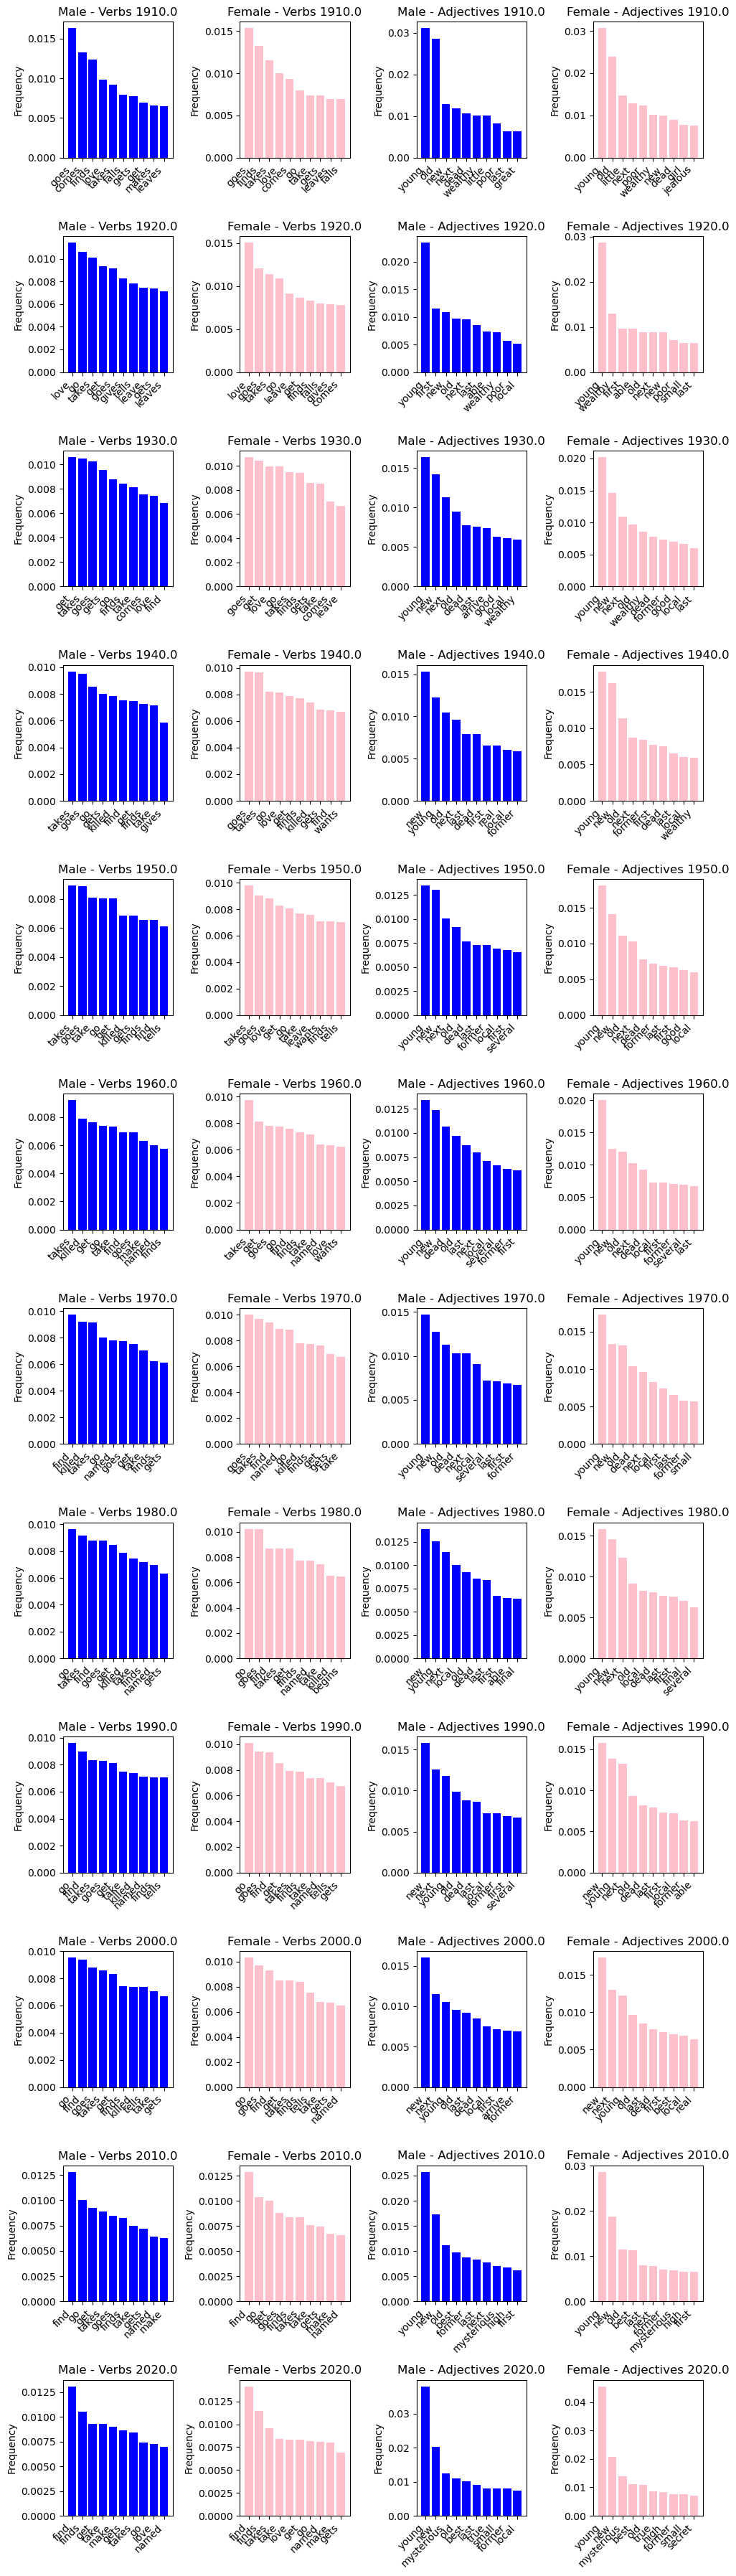

In [70]:
plot_top_words_per_decade(male_frequencies_per_decade, female_frequencies_per_decade, ['Verbs', 'Adjectives'])